<a href="https://colab.research.google.com/github/hi-vvn/Unit-2-Mini-Project/blob/main/Unit_2_Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 1: Environment Setup**

In [178]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv')
df

#load file

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0
...,...,...,...,...,...,...
933493,2021-01-15,Sweetwater,Wyoming,56037.0,3262,26.0
933494,2021-01-15,Teton,Wyoming,56039.0,2605,4.0
933495,2021-01-15,Uinta,Wyoming,56041.0,1806,9.0
933496,2021-01-15,Washakie,Wyoming,56043.0,839,23.0


# **Task 2: Data Collection**

In [179]:
df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv')
df.head(30)

#Will analyze for state:Cali,NYC & Washington next

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0
5,2020-01-25,Orange,California,6059.0,1,0.0
6,2020-01-25,Cook,Illinois,17031.0,1,0.0
7,2020-01-25,Snohomish,Washington,53061.0,1,0.0
8,2020-01-26,Maricopa,Arizona,4013.0,1,0.0
9,2020-01-26,Los Angeles,California,6037.0,1,0.0


# **Task 3: Data Wrangling & EDA (Exploratory Data Analysis)**

In [180]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv')
dec_data = df[(df['date'] >= '2020-12-01') & (df['date'] <= '2020-12-31')]
dec_data
#Show just December data

dec_data.drop(labels='county',axis=1,inplace=True)
dec_data
dec_data.drop(labels='fips',axis=1,inplace=True)
dec_data
#Removed excess columns

dec_data = dec_data.loc[df['state'].isin(['California','New York','Washington'])]
dec_data
dec_data.groupby(['state']) [['cases','deaths']].apply(sum)
#Selected for Cali, NY & Washington
#this is task 3 (data wrangling)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,cases,deaths
state,,
California,53958843.0,683920.0
New York,25200181.0,1105629.0
Washington,6674793.0,98238.0


# **Task 4: Understand NY Covid 19 data in last 30 days**

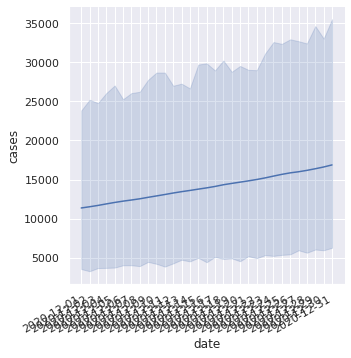

In [181]:
dec_NY = dec_data.query('state == "New York"')
dec_NY = dec_NY.set_index("date")
dec_NY.head()

plot = sns.relplot(x="date",y="cases",kind="line",data=dec_NY)
plot.fig.autofmt_xdate()
#Depiction of cases in NY in Dec

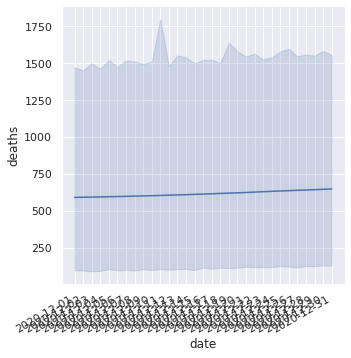

In [182]:
plot = sns.relplot(x="date",y="deaths",kind="line",data=dec_NY)
plot.fig.autofmt_xdate()
#Depiction of deaths in NY in Dec

There is a positive trend in both cases and deaths in NY.

#**Task 5&6: Comparing Covid 19 data with different states**

AxesSubplot(0.125,0.125;0.775x0.755)


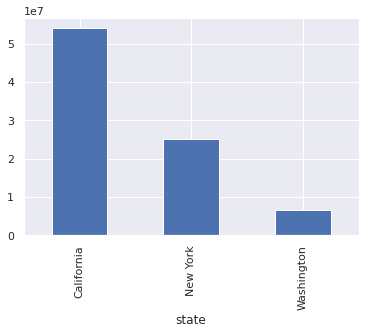

In [184]:
dec_data
print(dec_data.groupby(['state'])['cases'].sum().sort_values(ascending = False).plot(kind='bar'))
#cases comparison between California, New York & Washington

AxesSubplot(0.125,0.125;0.775x0.755)


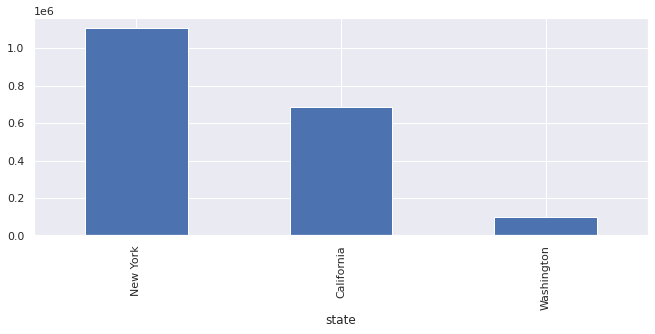

In [176]:
dec_data
print(dec_data.groupby(['state'])['deaths'].sum().sort_values(ascending = False).plot(kind='bar'))
#deaths comparison between California, New York & Washington

Compared to California and Washington, New York had more cases than did Washington but less cases than did California. On the other hand, compared to the two other states, New York had the most deaths.